In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset = pd.read_csv('/content/Sample - Superstore.csv', encoding='windows-1252')
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
dataset.nunique()

Row ID           9994
Order ID         5009
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [6]:
dataset.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
dataset.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [9]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'])
dataset['Order Year'] = dataset['Order Date'].dt.year
dataset['Order Month'] = dataset['Order Date'].dt.month
dataset['Month Year'] = dataset['Order Date'].dt.strftime('%Y-%m')

In [10]:
dataset = dataset.sort_values(['Order Date'], ascending=True).reset_index()

In [11]:
dataset['Order Date'].describe()

<ipython-input-11-966cfb0ff6bc>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dataset['Order Date'].describe()


count                    9994
unique                   1237
top       2016-09-05 00:00:00
freq                       38
first     2014-01-03 00:00:00
last      2017-12-30 00:00:00
Name: Order Date, dtype: object

In [12]:
dataset.head()

,index,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Month Year
0,7980,7981,CA-2014-103800,2014-01-03,1/7/2014,Standard Class,DP-13000,Darren Powers,Consumer,United States,...,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512,2014,1,2014-01
1,739,740,CA-2014-112326,2014-01-04,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717,2014,1,2014-01
2,740,741,CA-2014-112326,2014-01-04,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748,2014,1,2014-01
3,741,742,CA-2014-112326,2014-01-04,1/8/2014,Standard Class,PO-19195,Phillina Ober,Home Office,United States,...,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870,2014,1,2014-01
4,1759,1760,CA-2014-141817,2014-01-05,1/12/2014,Standard Class,MB-18085,Mick Brown,Consumer,United States,...,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840,2014,1,2014-01


In [13]:
dataset = dataset.drop(columns=['Order ID', 'Ship Date', 'Country', 'Postal Code', 'Discount'])
dataset.head()

,index,Row ID,Order Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Order Year,Order Month,Month Year
0,7980,7981,2014-01-03,Standard Class,DP-13000,Darren Powers,Consumer,Houston,Texas,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,5.5512,2014,1,2014-01
1,739,740,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,4.2717,2014,1,2014-01
2,740,741,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,-64.7748,2014,1,2014-01
3,741,742,2014-01-04,Standard Class,PO-19195,Phillina Ober,Home Office,Naperville,Illinois,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,-5.4870,2014,1,2014-01
4,1759,1760,2014-01-05,Standard Class,MB-18085,Mick Brown,Consumer,Philadelphia,Pennsylvania,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,4.8840,2014,1,2014-01


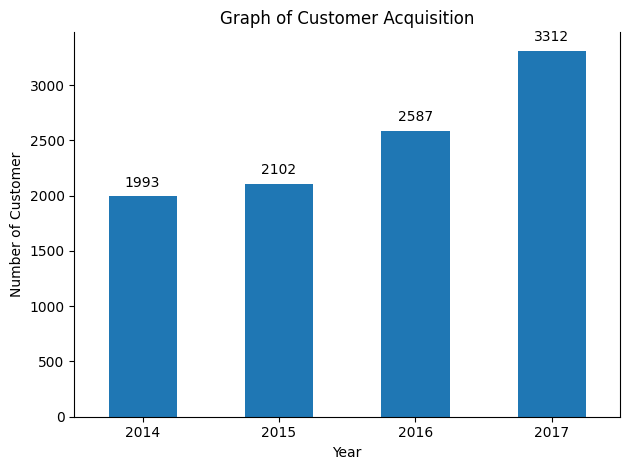

In [14]:
dataset_year = dataset.groupby('Order Year')['Customer ID'].count().plot(x='Order Year',
                                                                         y='Customer ID',
                                                                         kind='bar',
                                                                         title='Graph of Customer Acquisition')
for p in dataset_year.patches:
  dataset_year.annotate(format(p.get_height(), '.0f'),
                        (p.get_x()+p.get_width()/2., p.get_height()),
                        ha='center',
                        va='center',
                        xytext=(0,10),
                        textcoords='offset points')
dataset_year.spines['top'].set_visible(False)
plt.xlabel('Year')
plt.ylabel('Number of Customer')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Terlihat pada grafik, dimana setiap tahun customer terus bertambah, dan sangat signifikan pada tahun 2016 ke 2017

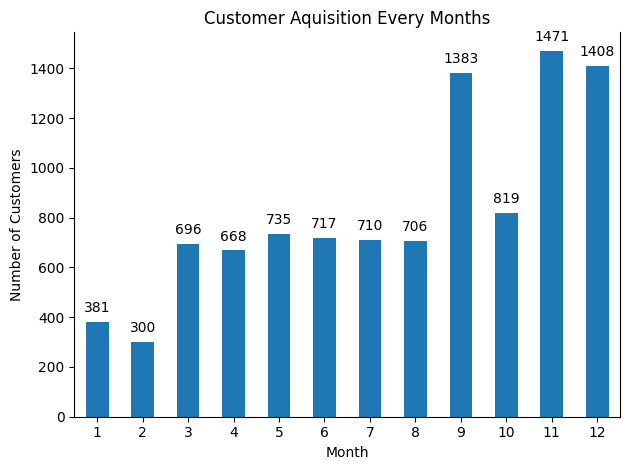

In [15]:
dataset_month=dataset.groupby('Order Month')['Customer ID'].count().plot(kind='bar',
                                                                         title='Customer Aquisition Every Months')
for p in dataset_month.patches:
  dataset_month.annotate(format(p.get_height(), '.0f'),
                           (p.get_x()+p.get_width()/2., p.get_height()),
                           ha='center',
                           va='center',
                           xytext=(0,10),
                           textcoords='offset points')
dataset_month.spines['top'].set_visible(False)
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

Peningkatan konsumen terjadi pada akhir tahun, sebaliknya pada awal tahun jumlah konsumen sangat sedikit

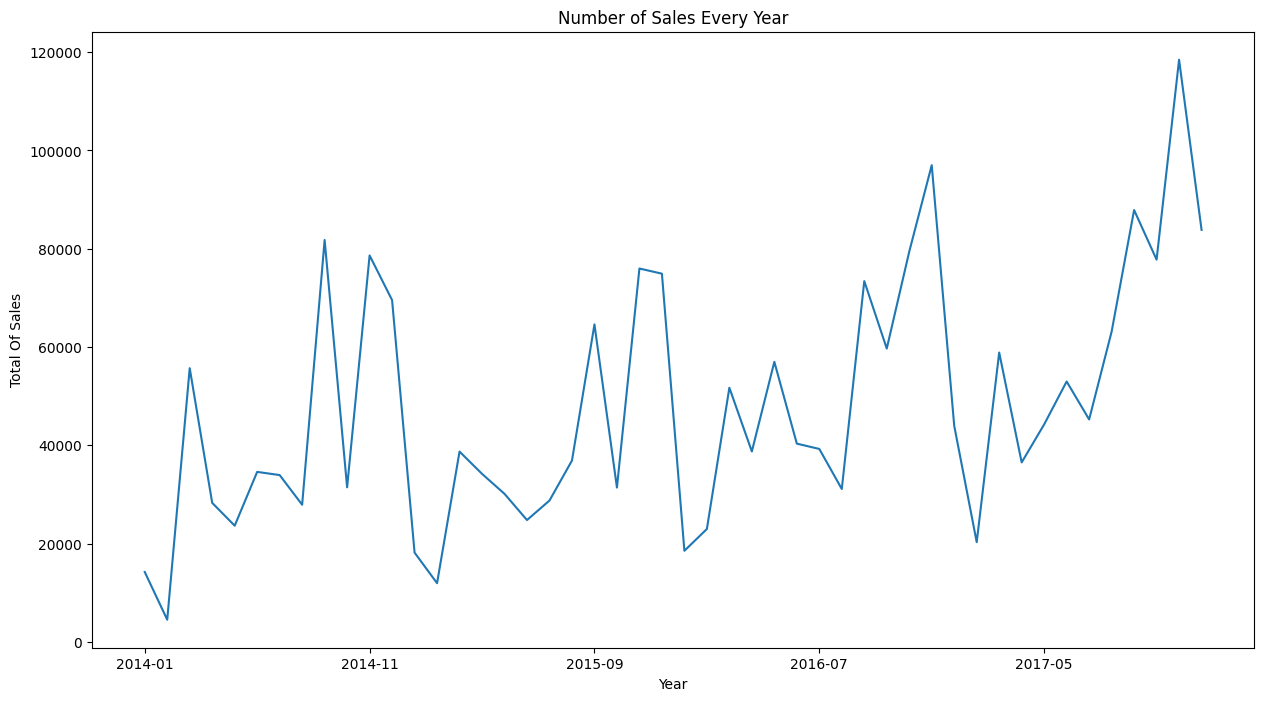

In [16]:
plt.figure(figsize=(15,8))
dataset.groupby(['Month Year'])['Sales'].sum().plot()
plt.xlabel('Year')
plt.ylabel('Total Of Sales')
plt.title('Number of Sales Every Year')
plt.show()

Setiap pergantian tahun, jumlah sales selalu berkurang drastis

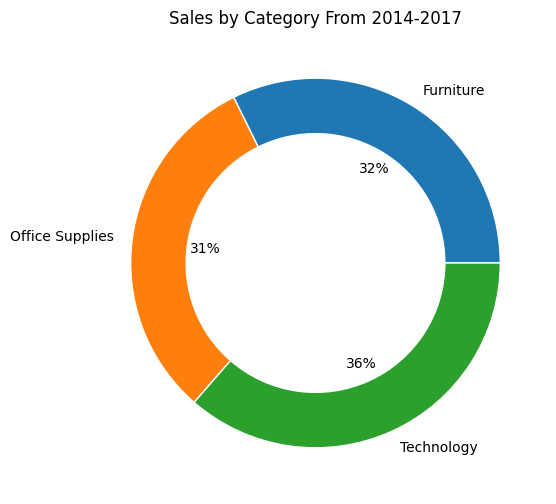

In [17]:
category_sales = dataset.groupby(['Category'])['Sales'].sum().reset_index()
plt.figure(figsize=(8,6))
wedgeprops = dict(width=0.3, edgecolor='w')
plt.pie(category_sales['Sales'], labels=category_sales['Category'], autopct='%.0f%%', wedgeprops=wedgeprops)
plt.title('Sales by Category From 2014-2017')
plt.show()

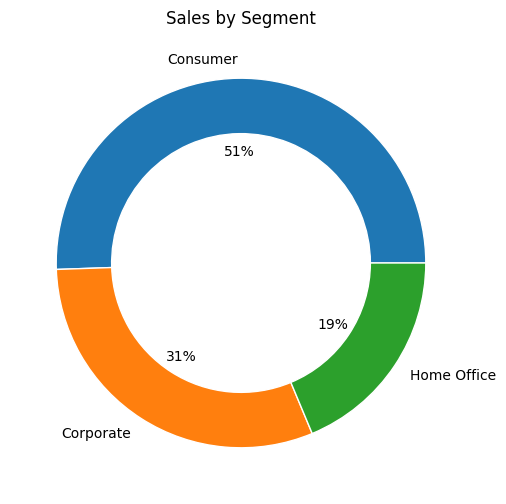

In [18]:
segment_sales = dataset.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(8,6))
wedgeprops=dict(width=0.3, edgecolor='w')
plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct='%.0f%%', wedgeprops=wedgeprops)
plt.title('Sales by Segment')
plt.show()

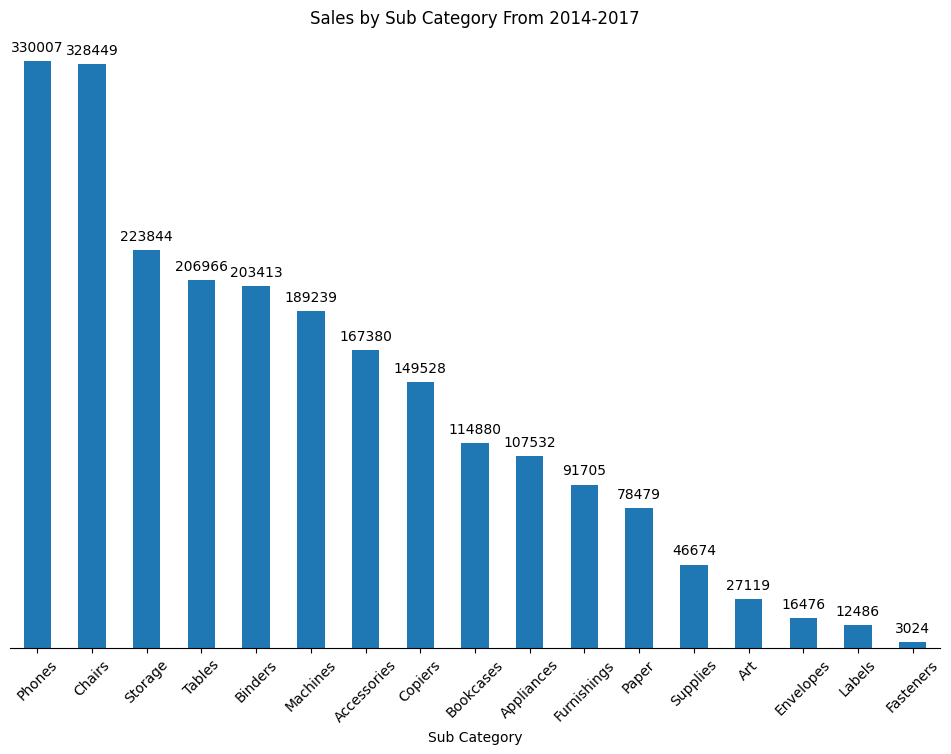

In [19]:
plt.figure(figsize=(12,8))
sub_sales = dataset.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).plot(kind='bar',
                                                                                        title='Sales by Sub Category From 2014-2017')
for p in sub_sales.patches:
  sub_sales.annotate(format(p.get_height(), '.0f'),
                           (p.get_x()+p.get_width()/2., p.get_height()),
                           ha='center',
                           va='center',
                           xytext=(0,10),
                           textcoords='offset points')
sub_sales.spines[['top', 'left', 'right']].set_visible(False)
sub_sales.axes.yaxis.set_visible(False)
plt.xlabel('Sub Category')
plt.xticks(rotation=45)
plt.show()

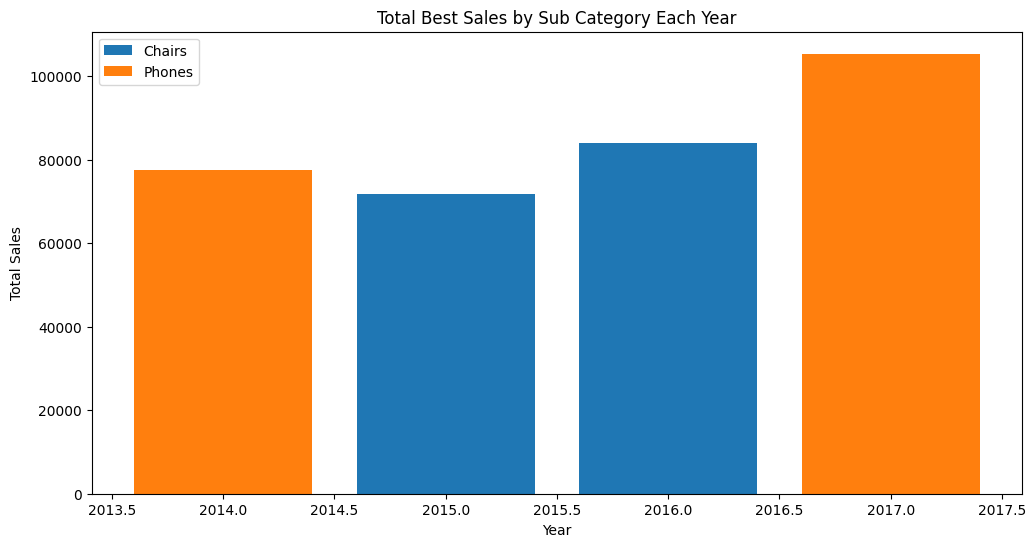

Total Best Sales Sub Category Each Year:
    Order Year Sub-Category       Sales
13        2014       Phones   77390.806
22        2015       Chairs   71734.529
39        2016       Chairs   83918.645
64        2017       Phones  105340.516


In [20]:
total_sales_per_year_subcat = dataset.groupby(['Order Year', 'Sub-Category'])['Sales'].sum().reset_index()
idx = total_sales_per_year_subcat.groupby('Order Year')['Sales'].idxmax()
highest_subcat = total_sales_per_year_subcat.loc[idx]

# Visualisasikan dengan Matplotlib (bar chart)
plt.figure(figsize=(12, 6))
for Category, data_category in highest_subcat.groupby('Sub-Category'):
    plt.bar(data_category['Order Year'], data_category['Sales'], label=f'{Category}')

plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Best Sales by Sub Category Each Year')
plt.legend()
plt.show()

print('Total Best Sales Sub Category Each Year:')
print(highest_subcat)

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          9994 non-null   int64         
 1   Row ID         9994 non-null   int64         
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Mode      9994 non-null   object        
 4   Customer ID    9994 non-null   object        
 5   Customer Name  9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   City           9994 non-null   object        
 8   State          9994 non-null   object        
 9   Region         9994 non-null   object        
 10  Product ID     9994 non-null   object        
 11  Category       9994 non-null   object        
 12  Sub-Category   9994 non-null   object        
 13  Product Name   9994 non-null   object        
 14  Sales          9994 non-null   float64       
 15  Quantity       9994 n

In [22]:
top_phone = dataset[(dataset['Sub-Category']=='Phones') & (dataset['Month Year'] >= '2017-01')]
top_ten_phones = top_phone.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)
top_ten_phones

,Product Name,Sales
119,Samsung Galaxy Mega 6.3,9239.780
121,Samsung Galaxy S III - 16GB - pebble blue (T-M...,4129.882
109,Polycom CX600 IP Phone VoIP phone,3599.400
110,Polycom SoundPoint IP 450 VoIP phone,3342.728
138,Wilson Electronics DB Pro Signal Booster,3293.600
123,Samsung Galaxy S4 Mini,3101.934
48,Google Nexus 5,3059.830
122,Samsung Galaxy S4,3004.752
44,GE 30524EE4,2939.850
113,Polycom VoiceStation 500 Conference phone,2595.560


In [23]:
top_state = dataset.groupby(['State', 'Region'])['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)
top_state

,State,Region,Sales
3,California,West,457687.6315
30,New York,East,310876.2710
41,Texas,Central,170188.0458
45,Washington,West,138641.2700
36,Pennsylvania,East,116511.9140
8,Florida,South,89473.7080
11,Illinois,Central,80166.1010
33,Ohio,East,78258.1360
20,Michigan,Central,76269.6140
44,Virginia,South,70636.7200


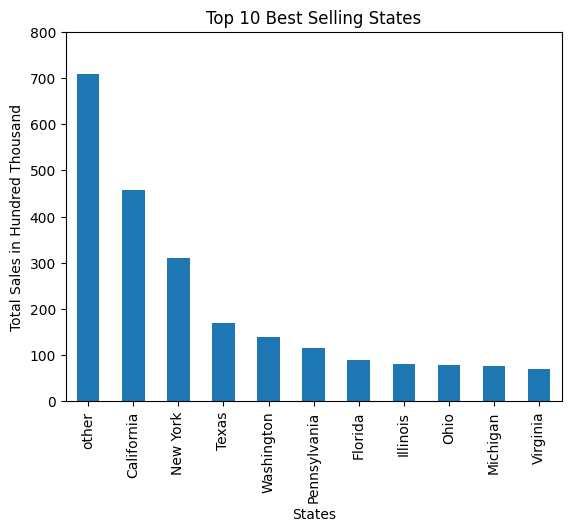

Top 10 Best Selling States
           State   Region        Sales
3     California     West  457687.6315
30      New York     East  310876.2710
41         Texas  Central  170188.0458
45    Washington     West  138641.2700
36  Pennsylvania     East  116511.9140
8        Florida    South   89473.7080
11      Illinois  Central   80166.1010
33          Ohio     East   78258.1360
20      Michigan  Central   76269.6140
44      Virginia    South   70636.7200


In [24]:
dataset['best_sales_states'] = dataset['State'].apply(lambda x:x if (x in top_state['State'].to_list()) else 'other')
dataset.groupby(['best_sales_states'])['Sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Top 10 Best Selling States')
plt.xlabel('States')
plt.ylabel('Total Sales in Hundred Thousand')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.show()
print('Top 10 Best Selling States')
print(top_state)

In [25]:
california_sales = dataset[dataset['State'] == 'California']
top_city_california_sales = california_sales.groupby('City')['Sales'].sum().reset_index().sort_values(by='Sales',
                                                                                                      ascending=False).head(5)

<ipython-input-26-028f992b3895>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  california_sales['top_five_city'] = california_sales['City'].apply(lambda x:x if (x in top_city_california_sales['City'].to_list())else 'other')


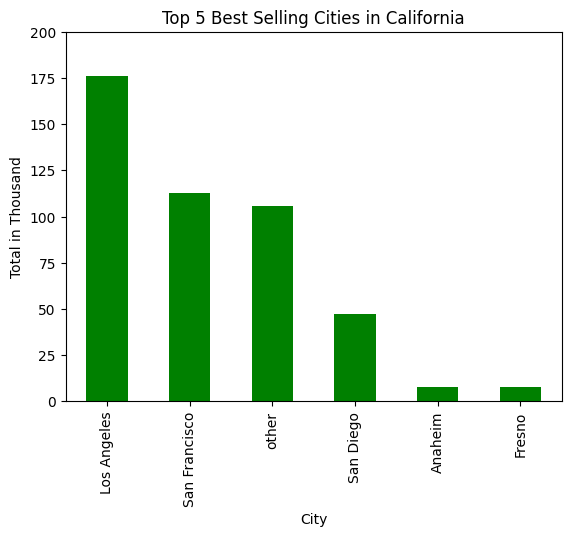

Top 5 Best Selling Cities in California
             City        Sales
33    Los Angeles  175851.3410
60  San Francisco  112669.0920
59      San Diego   47521.0290
0         Anaheim    7986.8700
20         Fresno    7888.5285


In [26]:
california_sales['top_five_city'] = california_sales['City'].apply(lambda x:x if (x in top_city_california_sales['City'].to_list())else 'other')
california_sales.groupby(['top_five_city'])['Sales'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('Top 5 Best Selling Cities in California')
plt.xlabel('City')
plt.ylabel('Total in Thousand')
plt.ylim(ymin=0)
labels, locations=plt.yticks()
plt.yticks(labels, (labels/1000).astype(int))
plt.show()
print('Top 5 Best Selling Cities in California')
print(top_city_california_sales)

In [27]:
customer_data = dataset.groupby(['Customer ID', 'Customer Name', 'Segment']).agg({'Quantity':'sum',
                                                                                'Sales':'sum'}).sort_values(by='Sales', ascending=False).reset_index()
customer_data.head(10)

,Customer ID,Customer Name,Segment,Quantity,Sales
0,SM-20320,Sean Miller,Home Office,50,25043.050
1,TC-20980,Tamara Chand,Corporate,42,19052.218
2,RB-19360,Raymond Buch,Consumer,71,15117.339
3,TA-21385,Tom Ashbrook,Home Office,36,14595.620
4,AB-10105,Adrian Barton,Consumer,73,14473.571
5,KL-16645,Ken Lonsdale,Consumer,113,14175.229
6,SC-20095,Sanjit Chand,Consumer,87,14142.334
7,HL-15040,Hunter Lopez,Consumer,50,12873.298
8,SE-20110,Sanjit Engle,Consumer,78,12209.438
9,CC-12370,Christopher Conant,Consumer,34,12129.072


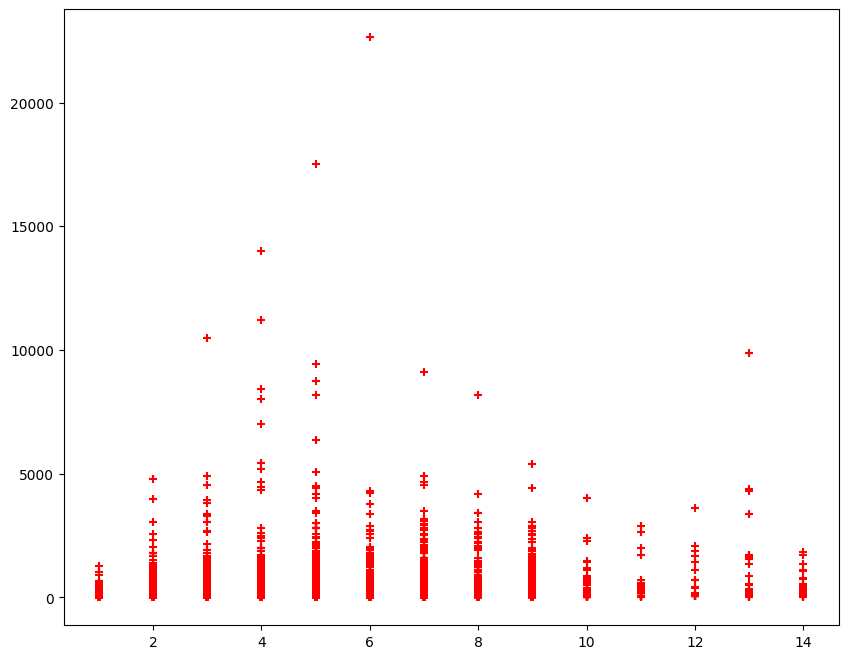

In [28]:
plt.figure(figsize=(10,8))
plt.scatter(dataset['Quantity'], dataset['Sales'], marker='+', color='red')
plt.title('')
plt.show()

Penjualan banyak terjadi pada kuantitas barang yang kecil

In [29]:
daily_sales = dataset.groupby('Order Date')['Sales'].sum()
daily_sales.head()

Order Date
2014-01-03      16.448
2014-01-04     288.060
2014-01-05      19.536
2014-01-06    4407.100
2014-01-07      87.158
Name: Sales, dtype: float64

In [30]:
daily = dataset.groupby(['Order Date']).agg({'Sales':'sum'}).sort_values(by='Order Date')
daily.head(20)

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158
2014-01-09,40.544
2014-01-10,54.830
2014-01-11,9.940
2014-01-13,3553.795


In [31]:
daily.describe()

,Sales
count,1237.000000
mean,1857.074261
std,2305.538776
min,2.025000
25%,377.736000
50%,1063.185000
75%,2395.786000
max,28106.716000


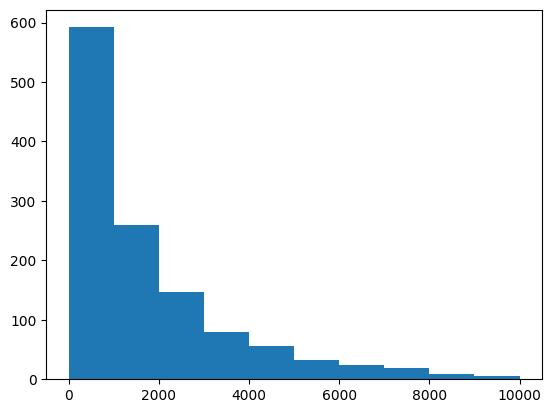

In [32]:
plt.hist(daily['Sales'], range=(0,10000) )
plt.show()

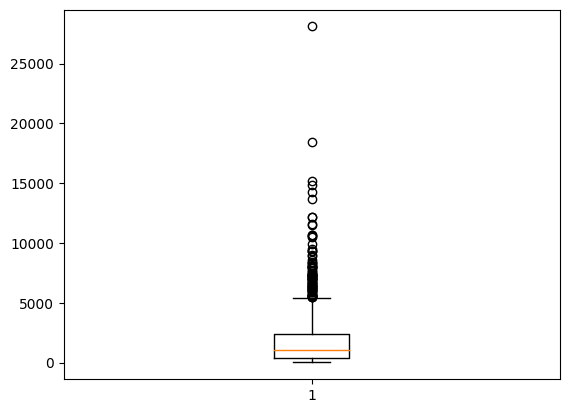

In [33]:
plt.boxplot(daily["Sales"])
plt.show()

In [34]:
def find_outliers_IQR(dataset):
  q1 = dataset.quantile(0.25)
  q3 = dataset.quantile(0.75)
  IQR = q3 - q1
  outliers = dataset[((dataset<(q1-1.5*IQR))|(dataset>(q3+1.5*IQR)))]
  return outliers

In [35]:
outliers = find_outliers_IQR(daily['Sales'])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 84
max outlier value: 28106.715999999997
min outlier value: 5463.008


Order Date
2014-03-18    28106.716
2014-06-09     5463.008
2014-07-25     8341.290
2014-09-08    14228.428
2014-09-19     9338.637
                ...    
2017-12-02     9951.182
2017-12-08     7643.041
2017-12-09     5470.390
2017-12-22     7442.021
2017-12-24     6233.054
Name: Sales, Length: 84, dtype: float64

In [36]:
dataset['Week Order'] = dataset['Order Date'].dt.strftime('%Y-%m-%W')

In [37]:
weekly_sales = dataset.groupby('Week Order').agg({'Sales':'sum'})
weekly_sales.head()

,Sales
Week Order,
2014-01-00,324.044
2014-01-01,4599.572
2014-01-02,4509.127
2014-01-03,3842.388
2014-01-04,961.764


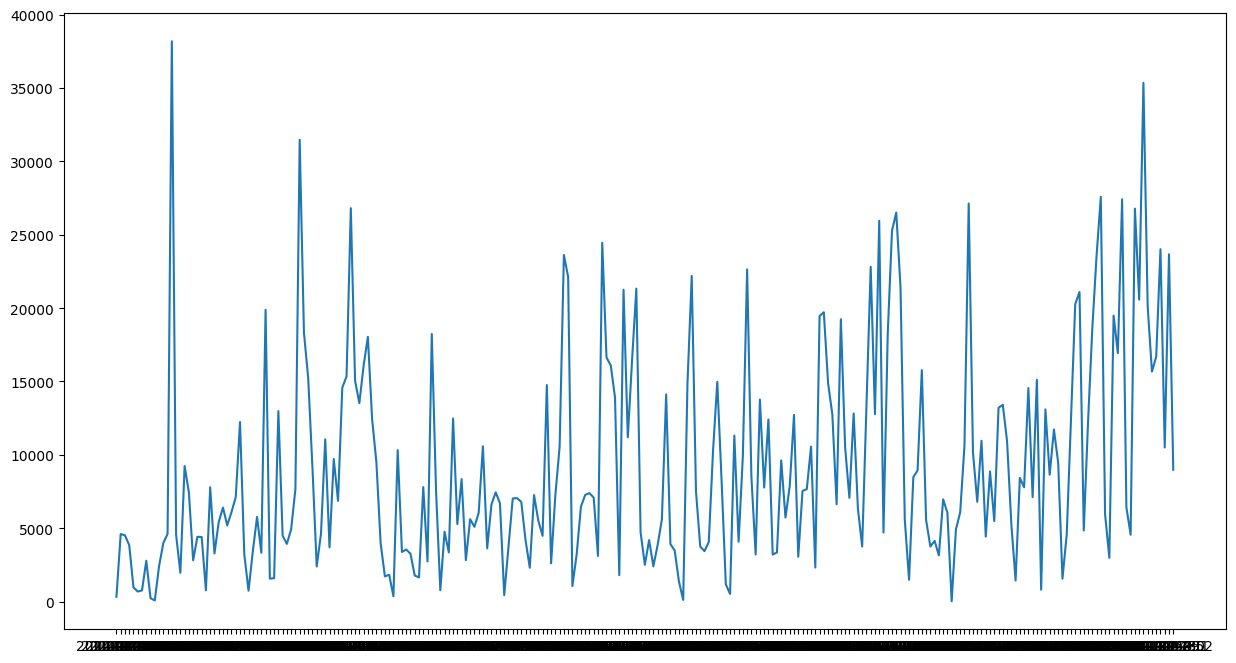

In [38]:
plt.figure(figsize=(15,8))
plt.plot(weekly_sales)
plt.show()

In [39]:
len(weekly_sales)

249

##Time Series Forecasting

In [40]:
sales_windowed = weekly_sales.copy()
for i in range(8):
  sales_windowed[f'Sales + {i+1}'] = sales_windowed['Sales'].shift(periods=i+1)
sales_windowed.dropna().head()

,Sales,Sales + 1,Sales + 2,Sales + 3,Sales + 4,Sales + 5,Sales + 6,Sales + 7,Sales + 8
Week Order,,,,,,,,,
2014-02-07,227.236,2780.094,756.888,680.546,961.764,3842.388,4509.127,4599.572,324.044
2014-02-08,75.128,227.236,2780.094,756.888,680.546,961.764,3842.388,4509.127,4599.572
2014-03-08,2405.535,75.128,227.236,2780.094,756.888,680.546,961.764,3842.388,4509.127
2014-03-09,3982.968,2405.535,75.128,227.236,2780.094,756.888,680.546,961.764,3842.388
2014-03-10,4611.522,3982.968,2405.535,75.128,227.236,2780.094,756.888,680.546,961.764


Make a feature and label

In [41]:
import numpy as np
x = sales_windowed.dropna().drop('Sales', axis=1).astype(np.float32).to_numpy()
y = sales_windowed.dropna()['Sales'].astype(np.float32).to_numpy()

Make a train and test dataset

In [42]:
import tensorflow as tf

In [43]:
train_dataset = tf.data.Dataset.from_tensor_slices(x)
test_dataset = tf.data.Dataset.from_tensor_slices(y)

Combine feature and test

In [44]:
dataset_forecasting = tf.data.Dataset.zip((train_dataset, test_dataset))
dataset_forecasting = dataset_forecasting.batch(24).prefetch(tf.data.AUTOTUNE)

Make a model to predict Sales next week

In [61]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam())
model_1.fit(dataset_forecasting,
          epochs=1000,
          verbose=1)

Epoch 1/1000
11/11 [==============================] - 1s 4ms/step - loss: 6432.5605
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 5565.7075
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step - loss: 5448.8955
Epoch 4/1000
11/11 [==============================] - 0s 3ms/step - loss: 5265.0942
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 5120.5405
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step - loss: 5063.0161
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 5137.5601
Epoch 8/1000
11/11 [==============================] - 0s 3ms/step - loss: 4795.0581
Epoch 9/1000
11/11 [==============================] - 0s 3ms/step - loss: 4822.6484
Epoch 10/1000
11/11 [==============================] - 0s 3ms/step - loss: 4713.7310
Epoch 11/1000
11/11 [==============================] - 0s 3ms/step - loss: 4803.8408
Epoch 12/1000
11/11 [==============================] - 0s 3ms/step - loss:

In [62]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x :tf.expand_dims(x, axis=1)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=5, padding='causal', activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
model_2.fit(dataset_forecasting,
            epochs=1000,
            verbose=1)

Epoch 1/1000
11/11 [==============================] - 1s 4ms/step - loss: 8097.5933
Epoch 2/1000
11/11 [==============================] - 0s 3ms/step - loss: 5502.8936
Epoch 3/1000
11/11 [==============================] - 0s 3ms/step - loss: 5615.0806
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step - loss: 5694.1860
Epoch 5/1000
11/11 [==============================] - 0s 3ms/step - loss: 5489.1440
Epoch 6/1000
11/11 [==============================] - 0s 3ms/step - loss: 5591.1108
Epoch 7/1000
11/11 [==============================] - 0s 3ms/step - loss: 5658.3804
Epoch 8/1000
11/11 [==============================] - 0s 4ms/step - loss: 5465.3188
Epoch 9/1000
11/11 [==============================] - 0s 4ms/step - loss: 5574.1548
Epoch 10/1000
11/11 [==============================] - 0s 3ms/step - loss: 5656.6733
Epoch 11/1000
11/11 [==============================] - 0s 4ms/step - loss: 5447.2617
Epoch 12/1000
11/11 [==============================] - 0s 3ms/step - loss:

In [63]:
inputs = tf.keras.layers.Input(shape=8)
x = tf.keras.layers.Lambda(lambda x : tf.expand_dims(x, axis=1))(inputs)
x = tf.keras.layers.LSTM(128, activation='relu', return_sequences=True)(x)
x = tf.keras.layers.LSTM(128, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
output = tf.keras.layers.Dense(1)(x)
model_3 = tf.keras.Model(inputs=inputs, outputs=output, name='model_3_LSTM')
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())
model_3.fit(dataset_forecasting,
            epochs=1000,
            verbose=1)

Epoch 1/1000
11/11 [==============================] - 3s 7ms/step - loss: 9006.5195
Epoch 2/1000
11/11 [==============================] - 0s 7ms/step - loss: 7928.6826
Epoch 3/1000
11/11 [==============================] - 0s 7ms/step - loss: 6505.6392
Epoch 4/1000
11/11 [==============================] - 0s 6ms/step - loss: 5567.2480
Epoch 5/1000
11/11 [==============================] - 0s 7ms/step - loss: 5281.3262
Epoch 6/1000
11/11 [==============================] - 0s 15ms/step - loss: 5037.5557
Epoch 7/1000
11/11 [==============================] - 0s 12ms/step - loss: 5031.1602
Epoch 8/1000
11/11 [==============================] - 0s 12ms/step - loss: 4954.1416
Epoch 9/1000
11/11 [==============================] - 0s 12ms/step - loss: 4829.1865
Epoch 10/1000
11/11 [==============================] - 0s 12ms/step - loss: 4807.5581
Epoch 11/1000
11/11 [==============================] - 0s 12ms/step - loss: 4757.4639
Epoch 12/1000
11/11 [==============================] - 0s 11ms/step 

In [48]:
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size:int,
               theta_size:int,
               horizon:int,
               n_neurons:int,
               n_layers:int,
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
      theta = self.theta_layer(x)
      backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
      return backcast, forecast

In [64]:
WINDOW_SIZE = 8

HORIZON = 1
N_EPOCHS = 1000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30
INPUT_SIZE = WINDOW_SIZE * HORIZON
THETA_SIZE = INPUT_SIZE + HORIZON

In [65]:
tensor_1 = tf.range(10)+10
tensor_2 = tf.range(10)
subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])
add = tf.keras.layers.add([tensor_1, tensor_2])

In [66]:
tf.random.set_seed(42)
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name='InitialBlock')

In [67]:
stack_input = tf.keras.layers.Input(shape=(INPUT_SIZE), name='stack_input')
backcast, forecast = nbeats_block_layer(stack_input)
residuals = tf.keras.layers.subtract([stack_input, backcast], name=f'substract_00')

In [68]:
for i, _ in enumerate(range(N_STACKS-1)):
  backcast, block_forecast = NBeatsBlock(
      input_size = INPUT_SIZE,
      theta_size = THETA_SIZE,
      horizon = HORIZON,
      n_neurons = N_NEURONS,
      n_layers = N_LAYERS,
      name = f'NbeatsBlock_{i}'
  )(residuals)

  residuals = tf.keras.layers.subtract([residuals, backcast], name=f'substract_{i}')
  forecast = tf.keras.layers.add([forecast, block_forecast], name=f'add_{i}')

model_4 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name='model_N_Beats')
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae', 'mse'])
model_4.fit(dataset_forecasting,
            epochs = N_EPOCHS,
            verbose=1)

Epoch 1/1000
11/11 [==============================] - 17s 20ms/step - loss: 11201.0117 - mae: 11201.0117 - mse: 224697248.0000
Epoch 2/1000
11/11 [==============================] - 0s 20ms/step - loss: 6414.5703 - mae: 6414.5703 - mse: 75194248.0000
Epoch 3/1000
11/11 [==============================] - 0s 19ms/step - loss: 5875.8325 - mae: 5875.8325 - mse: 63467036.0000
Epoch 4/1000
11/11 [==============================] - 0s 20ms/step - loss: 9269.1240 - mae: 9269.1240 - mse: 144925984.0000
Epoch 5/1000
11/11 [==============================] - 0s 19ms/step - loss: 5136.4766 - mae: 5136.4766 - mse: 52064100.0000
Epoch 6/1000
11/11 [==============================] - 0s 19ms/step - loss: 6389.3740 - mae: 6389.3740 - mse: 64007584.0000
Epoch 7/1000
11/11 [==============================] - 0s 19ms/step - loss: 5523.7002 - mae: 5523.7002 - mse: 57339000.0000
Epoch 8/1000
11/11 [==============================] - 0s 19ms/step - loss: 5204.3984 - mae: 5204.3984 - mse: 53734756.0000
Epoch 9/100

In [69]:
INTO_FUTURE = 8
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  future_forecast = []
  last_window = values[-window_size:]
  for _ in range(into_future):
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f'Predicting on:\n{last_window} -> Prediction:{tf.squeeze(future_pred).numpy()}\n')
    future_forecast.append(tf.squeeze(future_pred).numpy())
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  return future_forecast

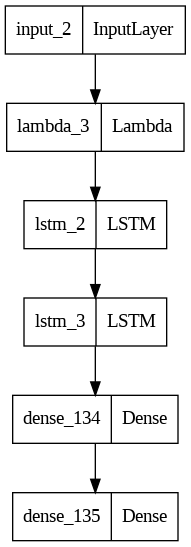

In [76]:
from tensorflow.keras.utils import plot_model
plot_model(model_3)

In [74]:
future_forecast = make_future_forecast(values=y, model=model_3,
                                       into_future=INTO_FUTURE, window_size=WINDOW_SIZE)

1/1 [==============================] - 1s 654ms/step
Predicting on:
[35344.42  20087.248 15668.368 16686.201 24006.957 10495.963 23662.363
  8977.832] -> Prediction:40607.49609375

1/1 [==============================] - 0s 87ms/step
Predicting on:
[20087.248 15668.368 16686.201 24006.957 10495.963 23662.363  8977.832
 40607.496] -> Prediction:12176.314453125

1/1 [==============================] - 0s 69ms/step
Predicting on:
[15668.368 16686.201 24006.957 10495.963 23662.363  8977.832 40607.496
 12176.314] -> Prediction:46080.94140625

1/1 [==============================] - 0s 29ms/step
Predicting on:
[16686.201 24006.957 10495.963 23662.363  8977.832 40607.496 12176.314
 46080.94 ] -> Prediction:6009.025390625

1/1 [==============================] - 0s 47ms/step
Predicting on:
[24006.957  10495.963  23662.363   8977.832  40607.496  12176.314
 46080.94    6009.0254] -> Prediction:19589.666015625

1/1 [==============================] - 0s 34ms/step
Predicting on:
[10495.963  23662.363  

In [75]:
future_forecast[:8]

[40607.496,
 12176.314,
 46080.94,
 6009.0254,
 19589.666,
 17841.588,
 21321.596,
 38899.29]